# <center><font color = '#DF9166' size = 20 center> **Financial News Analysis: EDA**</font></center>




## <font color = '#DF9166' size=6>**Table of content**<font/><a class = 'anchor' id = 'introduction'/>

1. [**Introduction**](#introduction)
2. [**Import Libraries**](#import)
3. [**Data Loading**](#data_loading)
4. [**Data Preprocessing**](#data_preprocessing)
5. [**Descriptive Statistics**](#descriptive_statistics)
6. [**Text Analysis**](#text_analysis)
7. [**Time Series Analysis**](#time_series_analysis)
8. [**Publisher Analysis** ](#publisher_analysis)

## <font color = '#DF9166' size=6>**Introduction**<font/><a class = 'anchor' id = 'introduction/'>

<font color = '#DF9166' size=5>**Business Objective**</font>

**Nova Financial Solutions** aims to enhance its predictive analytics capabilities to significantly boost its financial forecasting accuracy and operational efficiency through advanced data analysis. As a Data Analyst at Nova Financial Solutions,  your primary task is to conduct a rigorous analysis of the financial news dataset. The focus of your analysis should be two-fold:
- **Sentiment Analysis**: Perform sentiment analysis on the `headline` text to quantify the tone and sentiment expressed in financial news. This will involve using natural language processing (NLP) techniques to derive sentiment scores, which can be associated with the respective 'Stock Symbol' to understand the emotional context surrounding stock-related news.

- **Correlation Analysis**: Establish statistical correlations between the sentiment derived from news articles and the corresponding stock price movements. This involves tracking stock price changes around the date the article was published and analyzing the impact of news sentiment on stock performance. This analysis should consider the publication date and potentially the time the article was published if such data can be inferred or is available.

<font color = '#DF9166' size=5>**Dataset Overview**</font>

**FNSPID (Financial News and Stock Price Integration Dataset)** is a comprehensive financial dataset designed to enhance stock market predictions by combining quantitative and qualitative data.
The structure of the data is as follows:



- `headline`: Article release headline, the title of the news article, which often includes key financial actions like stocks hitting highs, price target changes, or company earnings.

- `url`: The direct link to the full news article.

- `publisher`: Author/creator of article.

- `date`: The publication date and time, including timezone information(UTC-4 timezone).

- `stock`: Stock ticker symbol (unique series of letters assigned to a publicly traded company). For example (AAPL: Apple)

<font color = '#DF9166' size=5>**Key Questions**</font>

In this notebook, we are going to explore and understand the dataset's structure and content by answering the following key questions:

- **Descriptive Statistics:**
  - What are the common characteristics of article headlines (length, word count, publisher activity)?
  - How does publication volume vary over time, and which stocks are most frequently covered?

- **Text Analysis:**
  - What is the sentiment distribution of the headlines, and how does sentiment vary across stocks and publishers?
  - What are the most common keywords, bigrams, and trigrams, and how do they reflect market trends?

- **Time Series Analysis:**
  - How does article frequency vary over time, and are there spikes linked to market events?

- **Publisher Insights:**
  - Which publishers dominate the dataset, and do they have unique patterns in sentiment, topics, and frequency?

- **Stock-Specific Analysis:**
  - Which stocks are most frequently mentioned, and how does their sentiment and coverage vary?

- **Predictive Insights:**
  - Can headline sentiment predict stock price movements or volatility?



## <font color = '#DF9166' size=6>**Import Libraries**<font/><a class = 'anchor' id = 'import'/>


In [ ]:
# Basic libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from glob import glob

# NLP libraries
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from gensim import corpora
from gensim.models import LdaModel
from wordcloud import WordCloud
from textblob import TextBlob
from transformers import pipeline

from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer


from IPython.display import clear_output
from IPython.display import Image

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('stopwords')
spacy.load('en_core_web_sm')
clear_output()

In [6]:
warnings.filterwarnings('ignore')

In [5]:
sns.set_style("whitegrid")

In [6]:
pd.set_option("display.max_colwidth", None)

## <font color = '#DF9166' size=6>**Data Loading**<font/><a class = 'anchor' id = 'data_loading'/>

In [11]:
RATING_DATA_PATH = '/content/drive/MyDrive/10 acadamy/W1 Challenge/data/raw_analyst_ratings.csv'

In [12]:
rating_df = pd.read_csv(RATING_DATA_PATH).drop('Unnamed: 0', axis=1)
rating_df.head(2)

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A


## <font color = '#DF9166' size=6>**Data Inspection**<font/><a class = 'anchor' id = 'data_loading'/>

In [17]:
print(f"Shape of Rating Dataframe: {rating_df.shape}")

Shape of Rating Dataframe: (1407328, 5)


In [18]:
print(f"Rating Dataframe Info: \n")
rating_df.info()

Rating Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


The `rating_df` DataFrame contains 1,407,328 entries with 5 columns: `headline`, `url`, `publisher`, `date`, and `stock`, all of which are non-null and of object data type.

In [19]:
# Descriptive statistics
print("Descriptive Statistics:\n")
rating_df.describe()

Descriptive Statistics:



,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,39957,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,5449,1704,228373,1766,3333


The **"Benzinga's Top Upgrades"** headline appears 5,449 times. Among publishers, **Paul Quintaro** dominates with 228,373 articles. The most represented date is 2020-03-12, suggesting a spike in activity on that day. In the stock column, **MRK** is mentioned 3,333 times, making it the most frequently cited ticker.

In [20]:
# Check for missing values
print("Missing Values:\n")
rating_df.isnull().sum()
# rating_df.isna().sum()

Missing Values:



,0
headline,0
url,0
publisher,0
date,0
stock,0


In [21]:
# Check for duplicate rows
print(f"Duplicate Rows: {rating_df.duplicated().sum()}")

Duplicate Rows: 1


The dataframe contains 1 duplicate row, which should be dropped to avoid  redundancy.

## <font color = '#DF9166' size=6>**Data Preprocessing**<font/><a class = 'anchor' id = 'data_preprocessing'/>

In [22]:
# Remove duplicate rows
rating_df = rating_df.drop_duplicates()

In [23]:
rating_df['date'].head(2)

,date
0,2020-06-05 10:30:54-04:00
1,2020-06-03 10:45:20-04:00


In [24]:
rating_df['date'].tail(2)

,date
1407326,2011-06-21 00:00:00
1407327,2011-05-12 00:00:00


The date column consists a mix of <font color = '#DF9166' size=3>timezone-aware timestamps</font> (e.g., `2020-06-05 10:30:54-04:00`) and <font color = '#DF9166' size=3>timezone-naive timestamps</font> (e.g., `2011-06-21 00:00:00`), which leads to inconsistencies in the datetime format. To standardize, the timezone-awere are localized to a common timezone (e.g., UTC) or have timezones removed entirely for consistency.

In [25]:
# Example: converting datetime string with timezone information to naive format.
pd.to_datetime('2019-06-28 09:26:38-04:00', format='ISO8601', utc=True)

Timestamp('2019-06-28 13:26:38+0000', tz='UTC')

In [26]:
rating_df['date'] = pd.to_datetime(rating_df['date'], format='ISO8601', utc=True)
rating_df['date'].head(3)

,date
0,2020-06-05 14:30:54+00:00
1,2020-06-03 14:45:20+00:00
2,2020-05-26 08:30:07+00:00


Now the date column is converted from `object` data type to `datetime` object. Notice all the column are standardized to UTC timezone.

In [27]:
# Extract date components
rating_df['year'] = rating_df['date'].dt.year
rating_df['month'] = rating_df['date'].dt.month
rating_df['day'] = rating_df['date'].dt.day
rating_df['hour'] = rating_df['date'].dt.hour
rating_df['day_of_week'] = rating_df['date'].dt.day_name()

rating_df.head(3)

,headline,url,publisher,date,stock,year,month,day,hour,day_of_week
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,2020,6,5,14,Friday
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,2020,6,3,14,Wednesday
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,2020,5,26,8,Tuesday


In [29]:
# Headline word count
rating_df['headline_word_count'] = rating_df['headline'].apply(lambda x: len(str(x).split()))

# Headline character length
rating_df['headline_char_length'] = rating_df['headline'].apply(len)

rating_df.head(2)

,headline,url,publisher,date,stock,year,month,day,hour,day_of_week,headline_word_count,headline_char_length
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,2020,6,5,14,Friday,7,39
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,2020,6,3,14,Wednesday,7,42


## <font color = '#DF9166' size=6>**Descriptive Statistics**<font/><a class = 'anchor' id = 'descriptive_statistics'/>

In [30]:
# Summary statistics for headline lengths
print("Headline Length Statistics:\n")
rating_df[['headline_char_length', 'headline_word_count']].describe()

Headline Length Statistics:



,headline_char_length,headline_word_count
count,1.407327e+06,1.407327e+06
mean,7.312054e+01,1.141671e+01
std,4.073532e+01,6.352998e+00
min,3.000000e+00,1.000000e+00
25%,4.700000e+01,7.000000e+00
50%,6.400000e+01,1.000000e+01
75%,8.700000e+01,1.300000e+01
max,5.120000e+02,7.700000e+01



The average headline is 73 characters and 11 words, with a high variability (41 characters, 6 words). Some headlines are very short (3 characters, 1 word), while others can be extremely long (512 characters, 77 words).

In [31]:
def generate_hist_box_plots(df, plot_data):
    """Generates histplots and boxplots for a list of dictionaries of title and column name."""
    num_cols = len(plot_data)
    fig, axes = plt.subplots(
        nrows=2,
        ncols=num_cols,
        figsize=(20, 5),
        # sharey="row",
        sharex="col",
        gridspec_kw={"height_ratios": [7, 0.4]},
    )

    for i in range(len(plot_data)):
        sns.histplot(df[plot_data[i]["column"]], kde=True, ax=axes[0, i])
        sns.boxplot(x=df[plot_data[i]["column"]], ax=axes[1, i], orient="h")
        axes[1, i].set_xlabel(plot_data[i]["label"], fontsize=10)
        axes[0, i].set_title(plot_data[i]["title"], fontsize=10)

    axes[0, 0].set_ylabel("Frequency", fontsize=10)
    axes[0, 1].set_ylabel("Frequency", fontsize=10)
    fig.tight_layout()
    plt.show()

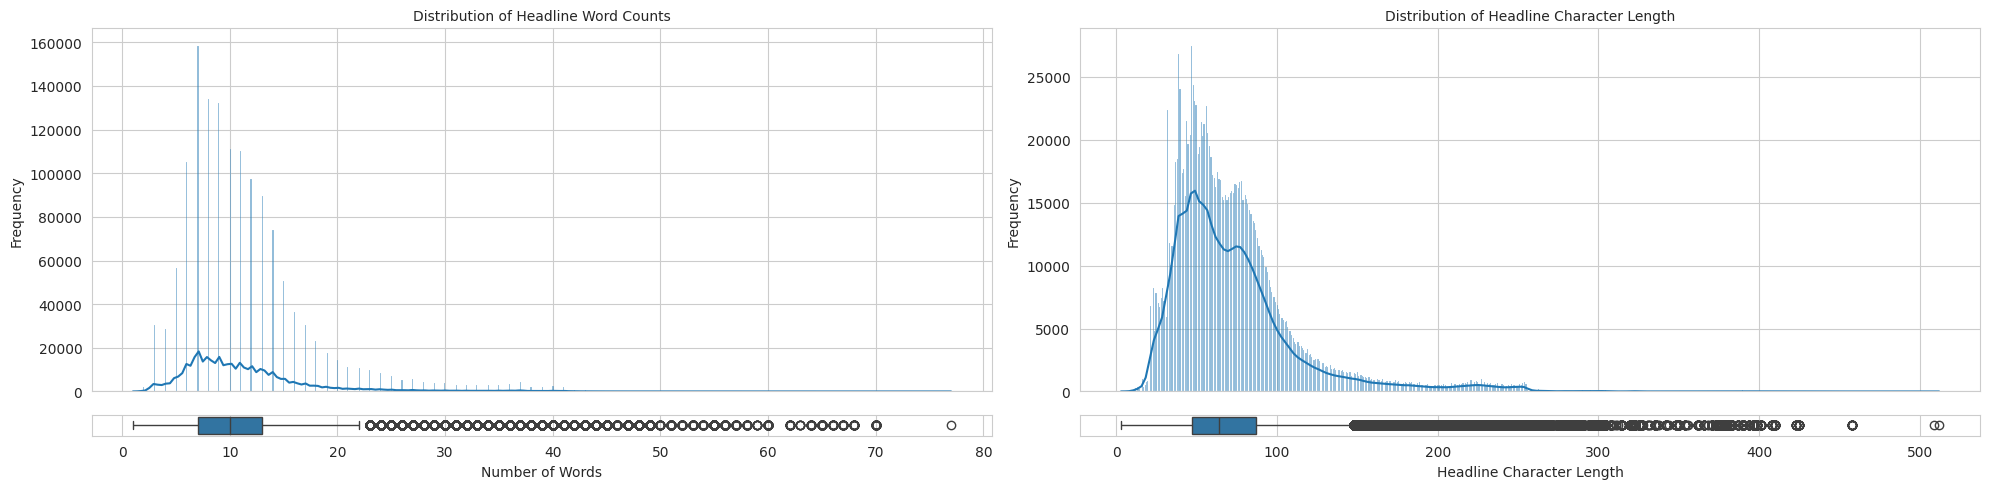

In [ ]:
generate_hist_box_plots(
    rating_df,
    plot_data=[
        {
            "column": "headline_word_count",
            "label": "Number of Words",
            "title": "Distribution of Headline Word Counts",
        },
        {
            "column": "headline_char_length",
            "label": "Headline Character Length",
            "title": "Distribution of Headline Character Length",
        },
    ],
)

Both headline word count and character length are right-skewed, with 50% of headlines(the median) having 10 words or fewer and 64 characters or less. The longer ones (up to 77 words and 512 characters) are rare which make the distribution have long tails.

In [32]:
print(f"Number of Unique Stocks: {rating_df['stock'].nunique()}")

Number of Unique Stocks: 6204


In [33]:
# Count the number of articles per stock
stock_counts = rating_df['stock'].value_counts()

print("Top 5 Stocks by Number of Articles:")
stock_counts.head(5)

Top 5 Stocks by Number of Articles:


,count
stock,
MRK,3333
MS,3238
NVDA,3146
MU,3142
QQQ,3106


In [34]:
print("Bottom 5 Stocks by Number of Articles:")
stock_counts.tail(5)

Bottom 5 Stocks by Number of Articles:


,count
stock,
PLW,1
RFT,1
WIP,1
ONEQ,1
BHL,1


In [35]:
print(f"Number of stocks with 50 or fewer articles: {len(stock_counts[stock_counts <= 50])}")

Number of stocks with 50 or fewer articles: 2102


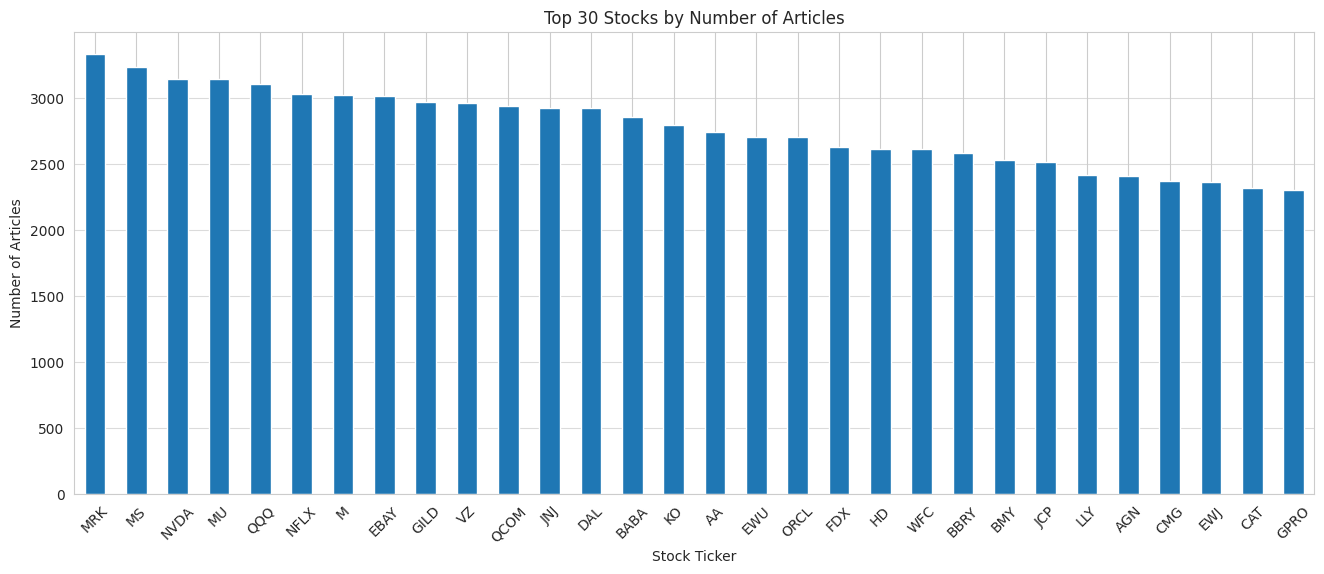

In [ ]:
plt.figure(figsize=(16, 6))
stock_counts.head(30).plot(kind='bar',)
plt.title('Top 30 Stocks by Number of Articles')
plt.xlabel('Stock Ticker')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.show()

The dataset includes 6,204 unique stocks. The top 5 stocks by the number of articles are MRK, MS, NVDA, MU, and QQQ, with counts ranging from 3,106 to 3,333 articles. Conversely, the bottom 5 stocks (PLW, RFT, WIP, ONEQ, BHL) have only 1 article each, and 2,102 stocks have 50 or fewer articles.

## <font color = '#DF9166' size=6>**Text Analysis**<font/><a class = 'anchor' id = 'text_analysis'/>

### Sentiment Analysis

In [36]:
def analyze_sentiment(headline):
    """Function to calculate sentiment score using TextBlob"""
    analysis = TextBlob(headline)
    return analysis.sentiment.polarity

In [37]:
def analyze_sentiment_roberta(headline):
    """Analyzes the sentiment of a given headline using the distilroberta model"""
    pipe = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
    result = pipe(headline)[0]
    return result

In [38]:
rand_idx = np.random.randint(0, len(rating_df))

print(f"Headline: {rating_df['headline'][rand_idx]}")
print(f"Sentiment Score(TextBlob): {analyze_sentiment(rating_df['headline'][rand_idx])}")
print(f"Sentiment Score(Roberta): {analyze_sentiment_roberta(rating_df['headline'][rand_idx])}")

Headline: 10 Stocks Moving In Wednesday's Pre-Market Session
Sentiment Score(TextBlob): 0.0
Sentiment Score(Roberta): {'label': 'neutral', 'score': 0.9998393058776855}


In [39]:
# sentiment analysis using textblob
rating_df['sentiment_score_textblob'] = rating_df['headline'].apply(analyze_sentiment)

# Categorize sentiment
rating_df['sentiment_label_textblob'] = pd.cut(
    rating_df['sentiment_score_textblob'],
    bins=[-1, -0.01, 0.01, 1],
    labels=['Negative', 'Neutral', 'Positive']
)

In [ ]:
# Sentiment analysis using distill-robera

pipe = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis", device='cuda')
roberta_results = pipe(rating_df['headline'].tolist())

# Add sentiment scores to the DataFrame
rating_df['sentiment_label_roberta'] = [result['label'].capitalize() for result in roberta_results]
rating_df['sentiment_score_roberta'] = [result['score'] for result in roberta_results]

In [42]:
columns = [
    "headline",
    "sentiment_score_textblob",
    "sentiment_label_textblob",
    "sentiment_label_textblob",
    "sentiment_score_roberta",
    "sentiment_score_roberta",
]
rating_df[columns].head(3)

,headline,sentiment_score_textblob,sentiment_label_textblob,sentiment_label_textblob,sentiment_score_roberta,sentiment_score_roberta
0,Stocks That Hit 52-Week Highs On Friday,0.0,Neutral,Neutral,0.956071,0.956071
1,Stocks That Hit 52-Week Highs On Wednesday,0.0,Neutral,Neutral,0.955800,0.955800
2,71 Biggest Movers From Friday,0.0,Neutral,Neutral,0.999808,0.999808


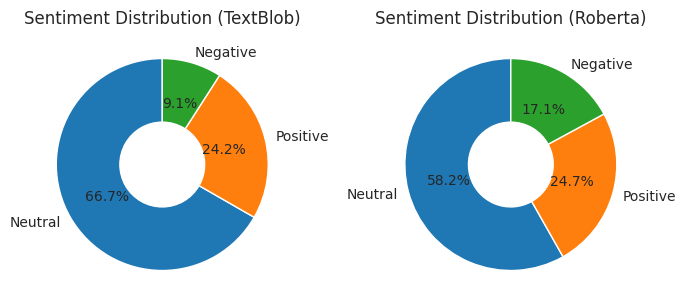

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(7, 5))

sentiment_counts_textblob = rating_df["sentiment_label_textblob"].value_counts()
sentiment_counts_roberta = rating_df['sentiment_label_roberta'].value_counts()

# Donut plot for sentiment_label_textblob
axes[0].pie(
    sentiment_counts_textblob.values,
    labels=sentiment_counts_textblob.index,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.6),
)
axes[0].set_title("Sentiment Distribution (TextBlob)")

# Donut plot for sentiment_label_roberta
axes[1].pie(
    sentiment_counts_roberta.values,
    labels=sentiment_counts_roberta.index,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.6),
)
axes[1].set_title("Sentiment Distribution (Roberta)")
plt.tight_layout()
plt.show()

TextBlob labels more headlines as **Neutral** (66.7%) compared to Roberta (58.2%). Roberta assigns a higher percentage of **Negative** sentiments (17.1%) than TextBlob (9.1%).

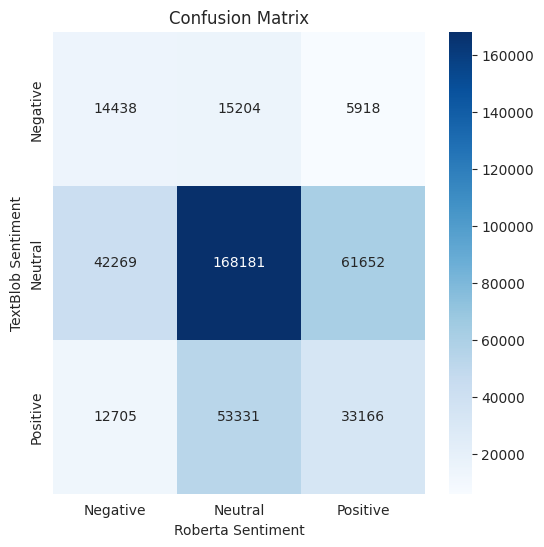

In [44]:
# Create the confusion matrix
cm = confusion_matrix(
    rating_df["sentiment_label_textblob"].astype(str),
    rating_df["sentiment_label_roberta"].astype(str),
    labels=["Negative", "Neutral", "Positive"],
)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Negative", "Neutral", "Positive"],
    yticklabels=["Negative", "Neutral", "Positive"],
)
plt.xlabel("Roberta Sentiment")
plt.ylabel("TextBlob Sentiment")
plt.title("Confusion Matrix")
plt.show()

This confusion matrix compares TextBlob and Roberta for sentiment classification. Both models align mostly on Neutral sentiments, but
there are clear discrepancies in the classification of Positive and Negative sentiments between the two. To determine the best model, let’s examine specific examples of their performance.

In [73]:
def display_confused_elements(df, sentiment, n=10):
    """
    Displays n headlines where TextBlob and Roberta disagree on the sentiment."""

    confused_df = df[
        (df["sentiment_label_textblob"] == sentiment) &
        (df["sentiment_label_roberta"] != sentiment)
    ]
    return confused_df[[
        "headline",
        "sentiment_label_textblob",
        "sentiment_label_roberta"
    ]].head(n)

In [74]:
print("Top 5 Headlines where TextBlob and Roberta disagree (Negative):\n")
display_confused_elements(rating_df, "Negative")

Top 5 Headlines where TextBlob and Roberta disagree (Negative):



,headline,sentiment_label_textblob,sentiment_label_roberta
24,Agilent Reports Has Become Top-Level Sponsor Of My Green Lab,Negative,Neutral
114,Agilent Shares Unaffected As Hearing FDA Approved Co.'s PD-L1 IHC 22C3 PharmDx Assay For Expanded Use,Negative,Positive
128,"Bank of America Maintains Buy on Agilent Technologies, Inc. Common Stock, Lowers Price Target to $82",Negative,Positive
130,"Deutsche Bank Maintains Buy on Agilent Technologies, Inc. Common Stock, Lowers Price Target to $85",Negative,Positive
170,Agilent Highlights Letter To SEC Related To Material Misstatements In Twist Bioscience's S-1,Negative,Neutral
189,Waters Has Limited Upside Potential To Growth Expectations; Janney Steps to The Sidelines,Negative,Positive
221,Phillips 66 Says it Has Agreed to Repurchase 35M Shares of Phillips 66 Common Stock from Wholly-owned Subsidiary of Berkshire Hathaway,Negative,Positive
303,"Leerink Swann Assumes Agilent Technologies, Inc. Common Stock at Outperform",Negative,Neutral
327,"Agilent's FY17 Outlook Weaker Than Expected, But Looks Beatable, Morgan Stanley Says",Negative,Positive
397,Morning Market Losers,Negative,Neutral


In [75]:
print("\nTop 5 Headlines where TextBlob and Roberta disagree (Neutral):\n")
display_confused_elements(rating_df, "Neutral")


Top 5 Headlines where TextBlob and Roberta disagree (Neutral):



,headline,sentiment_label_textblob,sentiment_label_roberta
0,Stocks That Hit 52-Week Highs On Friday,Neutral,Positive
1,Stocks That Hit 52-Week Highs On Wednesday,Neutral,Positive
4,"B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88",Neutral,Positive
5,"CFRA Maintains Hold on Agilent Technologies, Lowers Price Target to $85",Neutral,Positive
6,"UBS Maintains Neutral on Agilent Technologies, Raises Price Target to $87",Neutral,Positive
8,"Wells Fargo Maintains Overweight on Agilent Technologies, Raises Price Target to $95",Neutral,Positive
11,"SVB Leerink Maintains Outperform on Agilent Technologies, Raises Price Target to $95",Neutral,Positive
16,Agilent Technologies Receives FDA Approval for PD-L1 as a Companion Diagnostic,Neutral,Positive
18,"Pershing Square 13F Shows Fund Raises Stake In Agilent Technologies To 12,626,593 Shares",Neutral,Positive
21,Shares of several healthcare companies are trading lower as markets dip following recent strength. Markets have sold off as investors weigh recent earnings and amid concerns of renewed US-China trade frictions.,Neutral,Negative


In [76]:
print("\nTop 5 Headlines where TextBlob and Roberta disagree (Positive):\n")
display_confused_elements(rating_df, "Positive")


Top 5 Headlines where TextBlob and Roberta disagree (Positive):



,headline,sentiment_label_textblob,sentiment_label_roberta
33,"Shares of several healthcare companies are trading lower, selling off from this week's strength. While the US stimulus package boosted economic optimism, demand concerns still exist amid the coronavirus outbreak.",Positive,Negative
45,"Benzinga's Top Upgrades, Downgrades For February 24, 2020",Positive,Neutral
46,Shares of several software companies are trading lower as the coronavirus cases surge outside of China. NOTE: The virus has raised fear of a global economic slowdown.,Positive,Negative
60,Agilent shares are trading lower. Not seeing any news to justify the price action.,Positive,Negative
69,"Benzinga's Top Upgrades, Downgrades For January 3, 2020",Positive,Neutral
74,There's A New Trading Tool That Allows Traders To Trade Cannabis With Leverage,Positive,Neutral
76,PreMarket Prep Recap: Yo-Yo Market And After-Hours Overshoot On Ackman's New Stake,Positive,Neutral
78,UPDATE: Bill Ackman's Pershing Square Files Amended 13F Showing New ~2.916M Share Stake In Agilent,Positive,Neutral
89,"Benzinga's Top Upgrades, Downgrades For November 15, 2019",Positive,Neutral
91,"Benzinga's Top Upgrades, Downgrades For October 18, 2019",Positive,Neutral


Roberta outperforms TextBlob since it is fine tuned for classifying financial news headlines.

In [80]:
# Sentiment Grouped by Publisher, mean aggregated

publisher_sentiment = rating_df.groupby('publisher')['sentiment_score_textblob'].mean().reset_index()
publisher_sentiment = publisher_sentiment.sort_values(by='sentiment_score_textblob', ascending=False)

In [81]:
# top 5 publisher with average positive Sentiment
print(f"Top 5 Publishers with Average Positive Sentiment:")
publisher_sentiment.head(5)

Top 5 Publishers with Average Positive Sentiment:


,publisher,sentiment_score_textblob
140,Brett Phillips,1.0
286,Eric Martin,1.0
857,The Professor,0.8
85,Ben Reynolds,0.8
307,Frank Ochoa,0.8


In [82]:
# top 5 publisher with average negative Sentiment
print(f"Top 5 Publishers with Average Negative Sentiment:")
publisher_sentiment.tail(5)

Top 5 Publishers with Average Negative Sentiment:


,publisher,sentiment_score_textblob
586,Maxime Croll,-0.40000
765,ScottKloustin,-0.40625
536,Logan Mohtashami,-0.50000
292,Euro Pacific Capital,-0.50000
792,Spencer James Lawrence,-0.90000


The top 5 publishers with the highest positive sentiment scores are Brett Phillips and Eric Martin (1.0), while the top 5 with the lowest negative sentiment scores are Spencer James Lawrence (-0.9) and ScottKloustin (-0.41)

In [ ]:
# Sentiment Grouped by Stock, mean aggregated

stock_sentiment = rating_df.groupby('stock')['sentiment_score_textblob'].mean().reset_index()
stock_sentiment = stock_sentiment.sort_values(by='sentiment_score_textblob', ascending=False)

In [ ]:
print(f"Top 5 Stocks with Average Positive Sentiment:")
stock_sentiment.head(5)

Top 5 Stocks with Average Positive Sentiment:


,stock,sentiment_score_textblob
3125,JPMV,0.800000
2067,FHK,0.700000
2515,GXP,0.612554
2782,IDHQ,0.600000
2731,HYLS,0.600000


In [ ]:
print(f"Top 5 Stocks with Average Positive Sentiment:")
stock_sentiment.tail(5)

Top 5 Stocks with Average Positive Sentiment:


,stock,sentiment_score_textblob
3504,MCZ,-0.350494
779,BUNT,-0.375000
4856,RWV,-0.400000
2498,GURX,-0.700000
5192,SPPRO,-1.000000


JPMV shows strong positive sentiment (0.8), while SPPRO has the lowest negative sentiment (-1.0), highlighting a divide in market perception. Positive sentiment often signals investor confidence and better stock performance. Negative sentiment suggests concerns or a poor outlook, potentially leading to weaker performance.

In [ ]:
# Group by publisher and stock, then calculate mean sentiment

combined_sentiment = rating_df.groupby(['publisher', 'stock'])['sentiment_score_textblob'].mean().reset_index()
combined_sentiment = combined_sentiment.sort_values(by='sentiment_score_textblob', ascending=False)

In [ ]:
print(f"Top Publisher-Stock Sentiment Combinations:")
combined_sentiment.head(5)

Top Publisher-Stock Sentiment Combinations:


,publisher,stock,sentiment_score_textblob
98228,Katey Stapleton,PWRD,1.0
110307,Mark Raymon,GY,1.0
52192,DividendYield,LEG,1.0
52191,DividendYield,KMB,1.0
52189,DividendYield,ED,1.0


In [ ]:
print(f"Bottom Publisher-Stock Sentiment Combinations:")
combined_sentiment.tail(5)

Bottom Publisher-Stock Sentiment Combinations:


,publisher,stock,sentiment_score_textblob
118857,Monica Gerson,ENSV,-1.0
136078,Roger Vertes,MDT,-1.0
116707,Michael Matthews,HRS,-1.0
91174,Joel Elconin,XLU,-1.0
121538,Monica Gerson,WMLP,-1.0


### Keyword Analysis

In [ ]:
# Identify the most frequently used words in headlines.

stop_words = set(stopwords.words('english'))
print(f"Stop words: {stop_words}")

def preprocess_text(headline):
    """Function to preprocess text"""
    tokens = word_tokenize(headline.lower())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

rating_df['processed_tokens'] = rating_df['headline'].apply(preprocess_text)

Stop words: {"needn't", 'yourself', 'are', 'doing', 'but', 'off', "you've", 'her', 'did', 'over', 'don', 'and', 'any', 'other', 'who', 'when', 'each', 'me', 'to', 'haven', 'as', 'you', 'such', 'after', 'the', 'that', 'shouldn', 'hasn', 'your', 'do', 'just', 'most', 'shan', 'before', 'during', 'if', 'now', 'll', 'ma', 'his', 'this', 'had', 'above', 'myself', "don't", 'our', "isn't", 'should', 'up', 'him', 'y', 'isn', "should've", 'only', "you're", "that'll", "weren't", "you'll", 'yours', 'at', "hadn't", "aren't", 'by', 'same', 'about', 'these', 'herself', 'than', 'i', 'does', "doesn't", 'from', 'few', 'below', 'nor', 'out', 'be', 'mightn', "didn't", 'own', 'ain', "hasn't", 'is', "you'd", 'wasn', 'until', 'those', 'their', 'then', 'into', 'hadn', 'needn', 'having', 'both', 'under', 'mustn', "mightn't", 'here', 'some', 'have', 'on', 'no', "shan't", 'o', 'ourselves', "she's", 'against', 'while', 'again', "shouldn't", "couldn't", 'couldn', 'themselves', 'being', "won't", 't', 'he', 'so', 'v

In [ ]:
rating_df.head(3)

,headline,url,publisher,date,stock,year,month,day,hour,day_of_week,headline_word_count,headline_char_length,sentiment_score_textblob,sentiment_label_textblob,processed_tokens
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,2020,6,5,14,Friday,7,39,0.0,Neutral,"[stocks, hit, highs, friday]"
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,2020,6,3,14,Wednesday,7,42,0.0,Neutral,"[stocks, hit, highs, wednesday]"
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,2020,5,26,8,Tuesday,5,29,0.0,Neutral,"[biggest, movers, friday]"


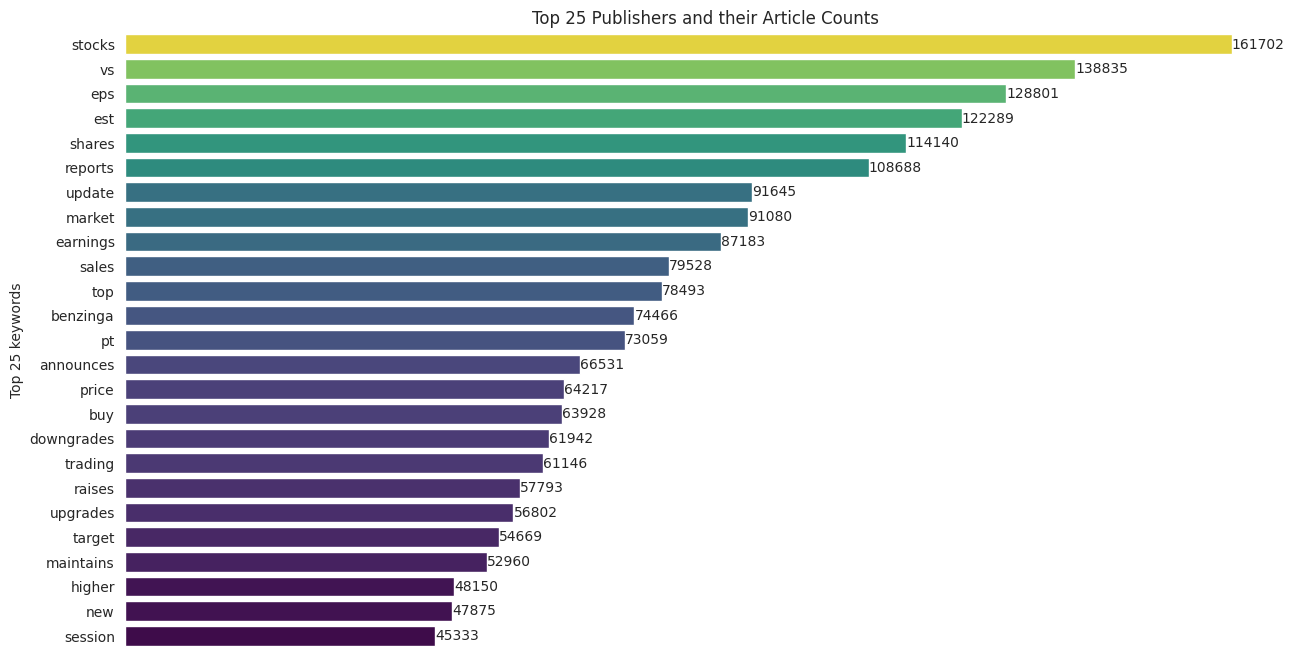

In [ ]:
# Frequency Distribution of Keywords

all_tokens = [token for tokens in rating_df['processed_tokens'] for token in tokens]
top_keywords = FreqDist(all_tokens).most_common(25)

keywords = [keyword for keyword, count in top_keywords]
counts = [count for keyword, count in top_keywords]

plt.figure(figsize=(15, 8))
ax = sns.barplot(x=counts, y=keywords, palette='viridis', hue=counts)
# Add value labels to the ends of the bars
for i, v in enumerate(counts):
    ax.text(v + 2, i, str(v), va='center')
plt.title('Top 25 Publishers and their Article Counts')
plt.xticks([])
plt.xlabel('')
# Remove splines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend().remove()
plt.ylabel('Top 25 keywords')
plt.show()

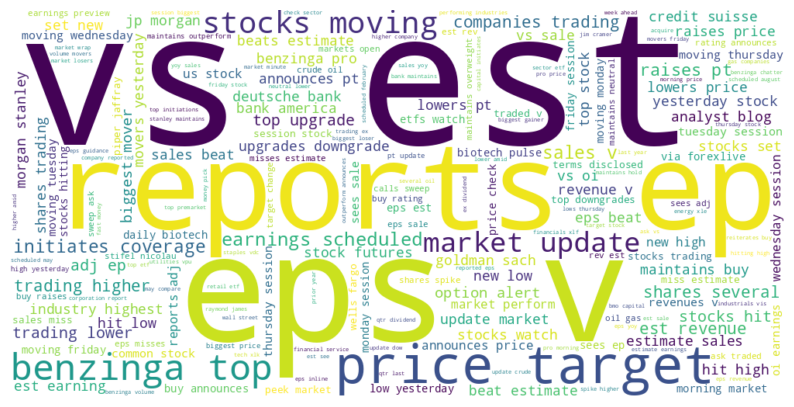

Word Cloud


In [ ]:
# Plot word cloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=stop_words,
    colormap='viridis'
).generate(' '.join(all_tokens))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

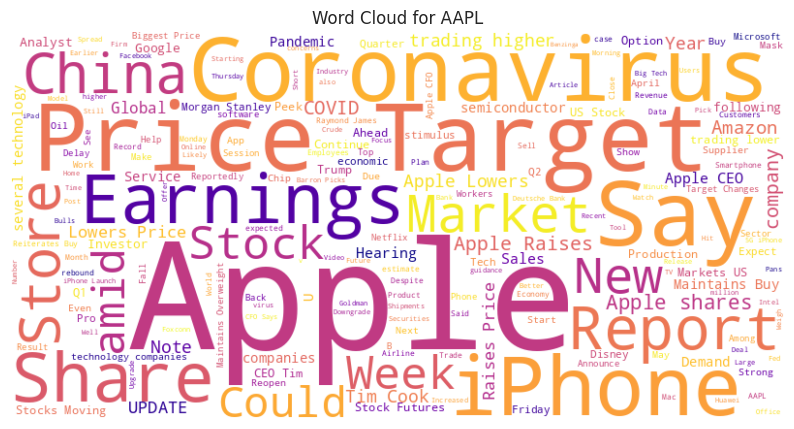

In [ ]:
# Stock-Related keywords

def stock_wordcloud(ticker):
    """Generates a word cloud for a specific stock."""
    stock_headlines = rating_df[rating_df['stock'] == ticker]['headline']
    stock_tokens = ' '.join(stock_headlines)
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stop_words,
        colormap='plasma'
    ).generate(stock_tokens)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {ticker}')
    plt.show()

stock_wordcloud('AAPL')

### Topic Modeling

In [ ]:
def perform_topic_modeling(df, num_topics=2, num_words=5):
    # Tokenization and removing stopwords using NLTK
    stop_words = set(stopwords.words('english'))
    df['tokens'] = df['headline'].apply(lambda x: [word for word in x.lower().split() if word not in stop_words])

    # Lemmatization using spaCy
    nlp = spacy.load('en_core_web_sm')
    df['tokens'] = df['tokens'].apply(lambda text: [token.lemma_ for token in nlp(" ".join(text)) if not token.is_stop])

    # Create a dictionary and a corpus (Bag-of-Words representation)
    dictionary = corpora.Dictionary(df['tokens'])
    corpus = [dictionary.doc2bow(text) for text in df['tokens']]

    # Build the LDA Model
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # Display Topics
    topics = lda_model.print_topics(num_words=num_words)
    print("Topics:\n")
    for topic in topics:
        print(topic)

    # Display Topic Distribution for the first document
    print("\nTopic Distribution for Document 0:")
    print(lda_model[corpus[0]])

In [ ]:
perform_topic_modeling(rating_df, num_topics=5, num_words=10)

### N-Gram Analysis

In [ ]:
def extract_ngrams(headlines, n=2, top_n=20):
    """Extracts and visualizes the top n-grams (bigrams/trigrams) in the text."""

    text_data = ' '.join(headlines)

    # Vectorize the text data for n-grams
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngram_matrix = vectorizer.fit_transform([text_data])

    # Sum occurrences of each n-gram
    ngram_counts = ngram_matrix.toarray().sum(axis=0)

    # Map n-grams to their frequencies
    ngram_freq = pd.DataFrame({
        'ngram': vectorizer.get_feature_names_out(),
        'count': ngram_counts
    }).sort_values(by='count', ascending=False).head(top_n)

    # Plot the top n-grams
    plt.figure(figsize=(10, 6))
    sns.barplot(data=ngram_freq, y='ngram', x='count', palette='viridis')
    plt.title(f'Top {top_n} {n}-grams in Headlines')
    plt.xlabel('Frequency')
    plt.ylabel('N-gram')
    plt.show()

    return ngram_freq

Top 20 Bigrams:


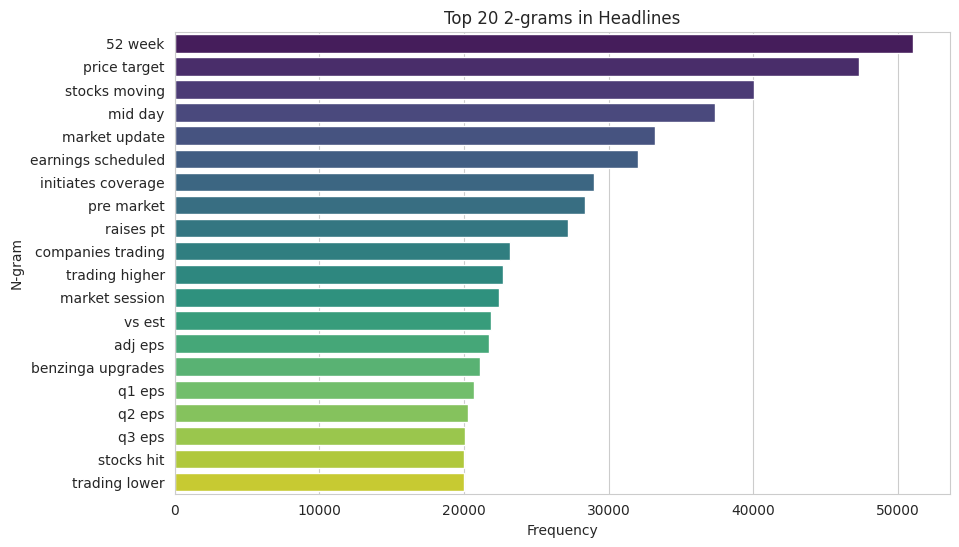

In [ ]:
# Bigram Analysis
print("Top 20 Bigrams:")
bigram_freq = extract_ngrams(rating_df['headline'], n=2, top_n=20)

Top 20 Trigrams:


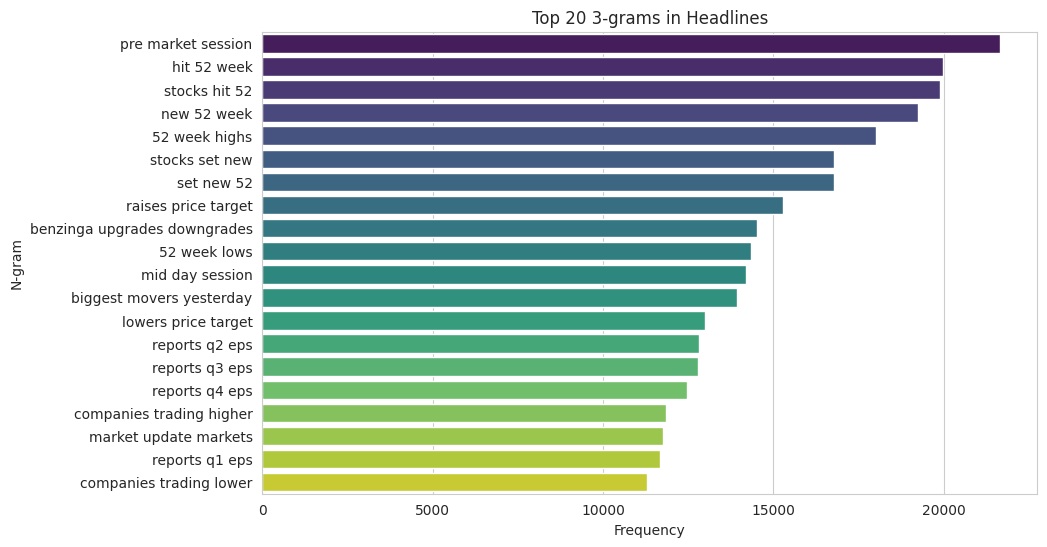

In [ ]:
# Trigram Analysis
print("Top 20 Trigrams:")
trigram_freq = extract_ngrams(rating_df['headline'], n=3, top_n=20)

The top bigrams include terms like "52 week," "price target," and "stocks moving," while the top trigrams focus on phrases like "pre market session" and "hit 52 week."

## <font color = '#DF9166' size=6>**Time Series Analysis**<font/><a class = 'anchor' id = 'time_series_analysis'/>

### Daily Trends

In [2]:
# Daily publication trend

date = pd.to_datetime(rating_df["date"], format="ISO8601").dt.date
publication_trend = rating_df.groupby(date).size().reset_index(name="article_count")
publication_trend.columns = ["Date", "Article Count"]

# Create an interactive plot using Plotly
fig = px.line(
    publication_trend,
    x="Date",
    y="Article Count",
    markers=True,
    title="Publication Frequency Over Time",
    labels={"Date": "Date", "Article Count": "Number of Articles"},
)

# Customize the layout
fig.update_layout(
    xaxis_title="Date", yaxis_title="Number of Articles", template="plotly_white"
)
fig.show()

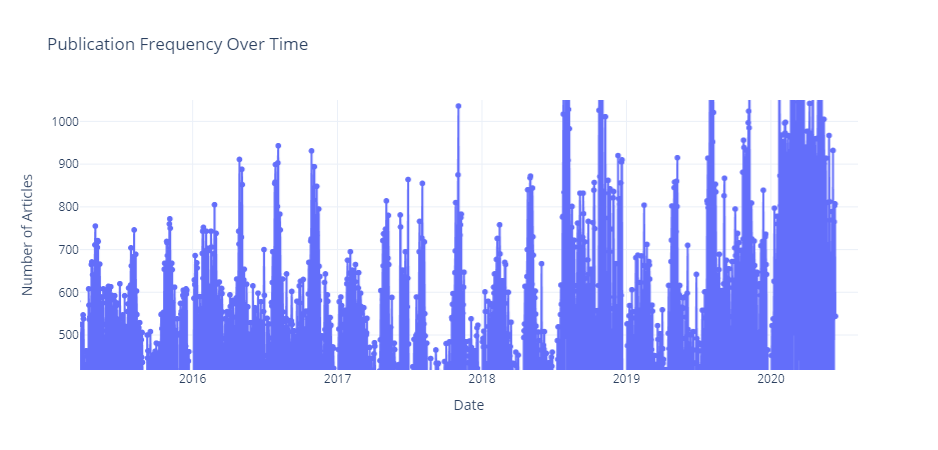

In [24]:
Image('C:/dev/Side-Projects/10 Acadamy/W1 Challange/Financial-News-and-Stock-Price-Analysis/assets/task-1/daily_trends.png')

In [16]:
# day with the most and least publications
max_publication_date = publication_trend.loc[publication_trend['Article Count'].idxmax()]
min_publication_date = publication_trend.loc[publication_trend['Article Count'].idxmin()]

print(f"The day with the most publications: {max_publication_date['Date']} with {max_publication_date['Article Count']} articles.")
print(f"The day with the least publications: {min_publication_date['Date']} with {min_publication_date['Article Count']} articles.")

The day with the most publications: 2020-03-12 with 2739 articles.
The day with the least publications: 2009-02-14 with 1 articles.


### Day of the Week Trends


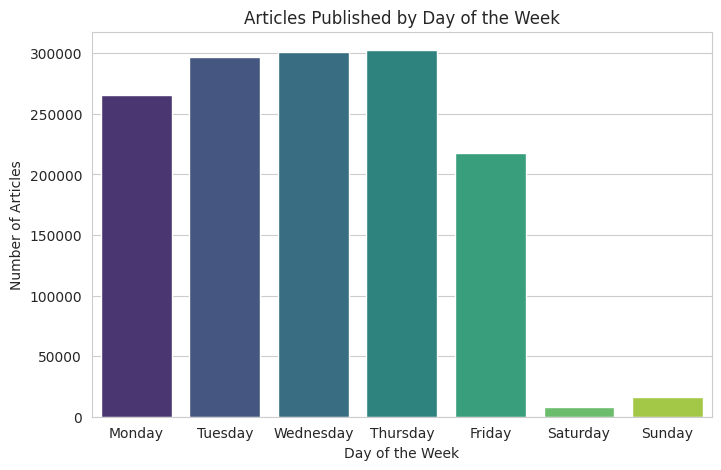

In [ ]:
# Articles published by day of the week
articles_by_day = rating_df['day_of_week'].value_counts()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8, 5))
sns.barplot(x=articles_by_day.index, y=articles_by_day.values, order=day_order, palette='viridis')
plt.title('Articles Published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.show()

The plot shows the number of publications for each day of the week. Thursday has the most publications with 302,619, while Saturday has the least with 7,759.  A noticeable trend is the decline in publications over the weekend, potentially due to market closures during these days.

### Monthly Trends

In [7]:
article_trends = pd.to_datetime(rating_df['date'], errors='coerce').dt.to_period('M').value_counts().sort_index()
print("First Article Date:", article_trends.index[0])
print("Last Article Date:", article_trends.index[-1])

First Article Date: 2009-02
Last Article Date: 2020-06


In [20]:
print(f"{article_trends.idxmax()} has the most publications with {article_trends.max()} articles published.")
print(f"{article_trends.idxmin()} has the least publications with {article_trends.min()} article published.")

2020-03 has the most publications with 24995 articles published.
2009-02 has the least publications with 1 article published.


In [8]:
article_trends = article_trends.reset_index()
article_trends.columns = ["Year-Month", "Article Count"]
article_trends["Year-Month"] = article_trends["Year-Month"].dt.to_timestamp()

# Create an interactive plot using Plotly
fig = px.line(
    article_trends,
    x="Year-Month",
    y="Article Count",
    markers=True,
    title="Article Publication Trends Over Time",
    labels={"Year-Month": "Year-Month", "Article Count": "Number of Articles"},
    color_discrete_sequence=["purple"],
)

# Customize the layout
fig.update_layout(
    xaxis_title="Year-Month",
    yaxis_title="Number of Articles",
    xaxis=dict(tickformat="%Y"),
    template="plotly_white",
)

# Show the interactive plot
fig.show()

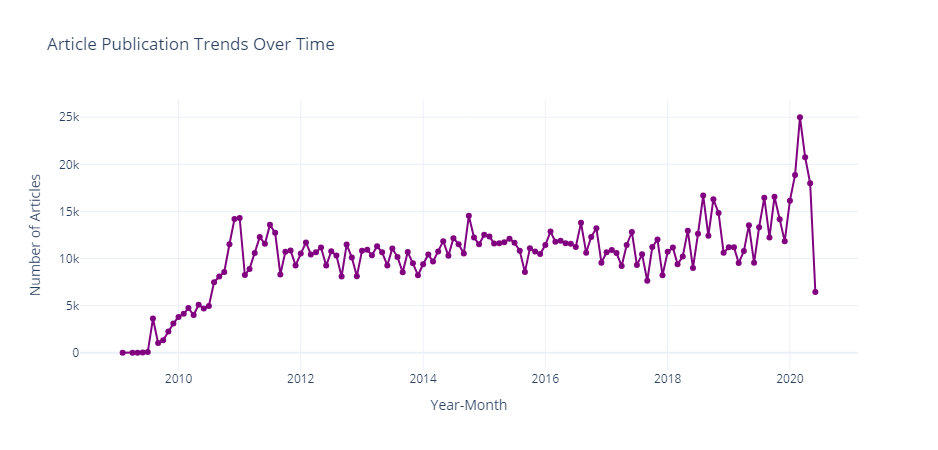

In [23]:
Image('C:/dev/Side-Projects/10 Acadamy/W1 Challange/Financial-News-and-Stock-Price-Analysis/assets/task-1/monthly-trends.png')

The dataset comprises of articles published between February 2009 and June 2020. March 2020 saw the highest number of publications with 24,995 articles, while February 2009 had the fewest with only 1 article.

### Sentiment Trends

#### Stock Sentiment Trend


In [9]:

def compare_stocks_sentiment(data, tickers, freq='D'):
    """Compare sentiment trends over time for multiple stocks."""
    sentiment_trends = []

    for stock in tickers:
        stock_data = data[data['stock'] == stock]
        # Ensure 'date' column is of datetime type before setting as index
        stock_data['date'] = pd.to_datetime(stock_data['date'], format='ISO8601')
        stock_data = stock_data.set_index('date')
        sentiment_trend = stock_data.resample(freq)['sentiment_score_textblob'].mean().reset_index()
        sentiment_trend['stock'] = stock
        sentiment_trends.append(sentiment_trend)

    # Combine all stock trends into a single DataFrame
    combined_trends = pd.concat(sentiment_trends)

    # Create an interactive plot using Plotly
    fig = px.line(combined_trends, x='date', y='sentiment_score_textblob', color='stock', markers=True,
                  title='Sentiment Trend Over Time for Selected Stocks',
                  labels={'date': 'Date', 'sentiment_score_textblob': 'Average Sentiment Score', 'stock': 'Stock'})

    # Customize the layout
    fig.update_layout(
        xaxis_title='Date',
        yaxis_title='Average Sentiment Score',
        template='plotly_white'
    )

    # Add a horizontal line for neutral sentiment
    fig.add_hline(y=0, line_dash="dash", line_color="red", annotation_text="Neutral Sentiment")

    # Show the interactive plot
    fig.show()

In [10]:
tickers = ['AAPL', 'GOOG', 'META', 'MSFT', 'AMZN', 'NVDA', 'TSLA']
compare_stocks_sentiment(rating_df, tickers, freq='D')

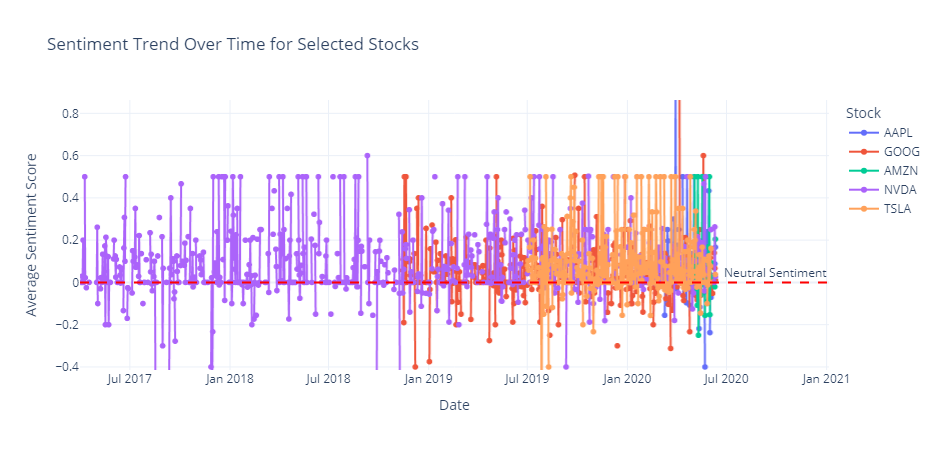

In [21]:
Image(filename='C:/dev/Side-Projects/10 Acadamy/W1 Challange/Financial-News-and-Stock-Price-Analysis/assets/task-1/stock-sentiment-trends.png')

Since most of the points are positioned above the neutral sentiment baseline, it suggests that the plotted stocks tend to have a generally positive average sentiment.

#### Publisher Sentiment Trend


In [11]:
# Function to plot sentiment trend over time for a list of publishers
def plot_publishers_sentiment_trend(data, publishers):
    """Plot sentiment trend over time for a list of publishers."""

    publishers_data = data[data["publisher"].isin(publishers)]
    publishers_data["date"] = pd.to_datetime(
        publishers_data["date"], format="ISO8601", errors="coerce"
    )

    # Aggregate sentiment by date and publisher
    publishers_trend = (
        publishers_data.groupby([publishers_data["date"].dt.date, "publisher"])[
            "sentiment_score_textblob"
        ]
        .mean()
        .reset_index()
    )
    publishers_trend.columns = ["Date", "Publisher", "Average Sentiment Score"]

    # Create an interactive plot using Plotly
    fig = px.line(
        publishers_trend,
        x="Date",
        y="Average Sentiment Score",
        color="Publisher",
        markers=True,
        title="Sentiment Trend Over Time for Selected Publishers",
        labels={
            "Date": "Date",
            "Average Sentiment Score": "Average Sentiment Score",
            "Publisher": "Publisher",
        },
    )

    # Customize the layout
    fig.update_layout(
        xaxis_title="Date",
        yaxis_title="Average Sentiment Score",
        template="plotly_white",
    )

    # Add a horizontal line for neutral sentiment
    fig.add_hline(
        y=0, line_dash="dash", line_color="red", annotation_text="Neutral Sentiment"
    )

    # Show the interactive plot
    fig.show()

In [12]:
top5_publishers = ['Paul Quintaro', 'Lisa Levin', 'Benzinga Newsdesk', 'Charles Gross', 'Monica Gerson']
plot_publishers_sentiment_trend(rating_df, top5_publishers)

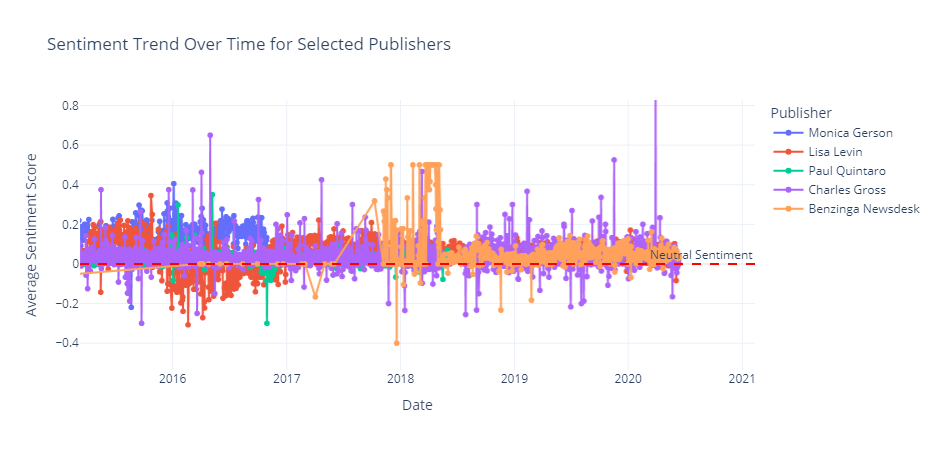

In [22]:
Image('C:/dev/Side-Projects/10 Acadamy/W1 Challange/Financial-News-and-Stock-Price-Analysis/assets/task-1/publisher-sentiment-trend.png')

As the majority of points lie above the neutral sentiment baseline, it can be inferred that the top 5 publishers generally exhibit a positive average sentiment.

## <font color = '#DF9166' size=6>**Publisher Analysis**<font/><a class = 'anchor' id = 'publisher_analysis'/>

In [ ]:
print("Total number of publishers:", rating_df['publisher'].nunique())

Total number of publishers: 1034


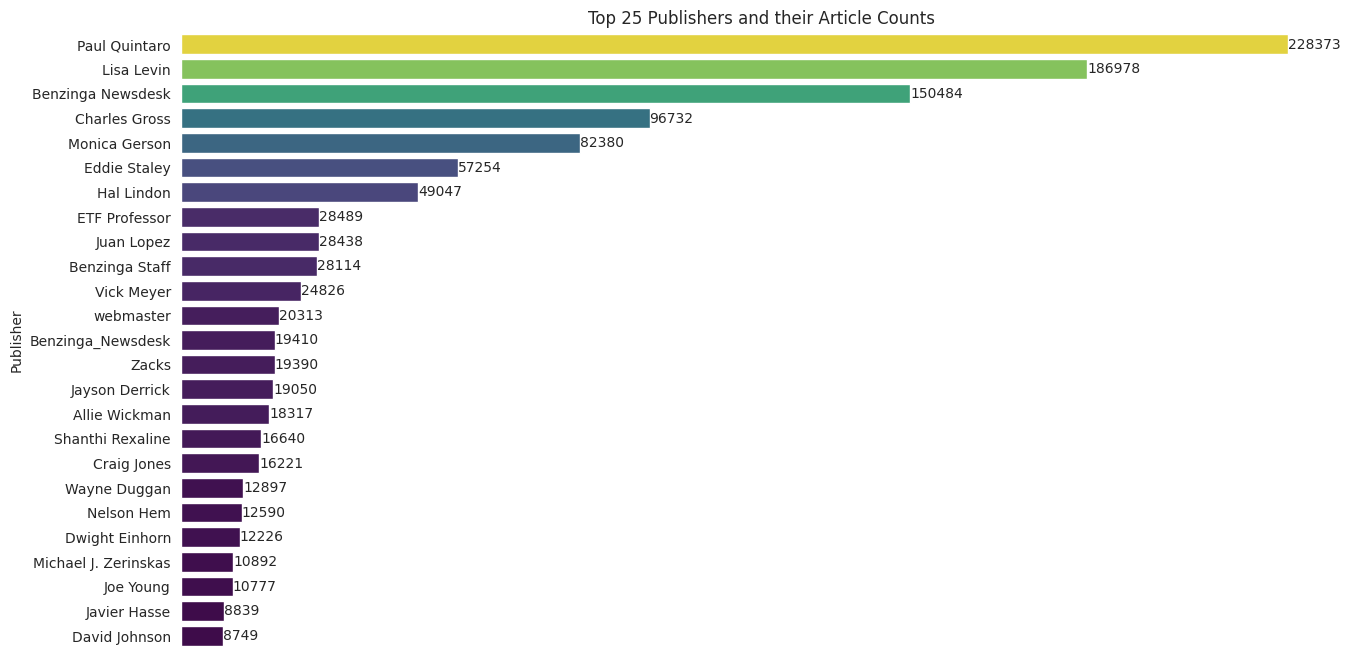

In [ ]:
# Count the number of articles per publisher
publisher_counts = rating_df['publisher'].value_counts().nlargest(25)
# publisher_counts = rating_df['publisher'].value_counts().head(25)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette='viridis', hue=publisher_counts.values)

# Add value labels to the ends of the bars
for i, v in enumerate(publisher_counts.values):
    ax.text(v + 2, i, str(v), va='center')

plt.title('Top 25 Publishers and their Article Counts')
plt.xticks([])
plt.xlabel('')

# Remove splines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.legend().remove()
plt.ylabel('Publisher')
plt.show()

Paul Quintaro has the most contribution by a wide margin, publishing over 228,000 articles.  In contrast, the next highest publisher contributed around 187,000 articles. This suggests that Paul Quintaro is a very important contributor to the dataset.

In [52]:
# Function for Publisher-Specific News Analysis
def plot_top_publishers_stocks_coverage(data, top_n=20):
    """Generate a heatmap to analyze coverage by the top N publishers and stocks."""

    # Group articles by publisher and stock
    publisher_stock_coverage = data.groupby(['publisher', 'stock']).size().unstack(fill_value=0)

    # Select the top N publishers and stocks based on coverage
    top_publishers = publisher_stock_coverage.sum(axis=1).nlargest(top_n).index
    top_stocks = publisher_stock_coverage.sum(axis=0).nlargest(top_n).index

    # Filter the data for the top publishers and stocks
    filtered_coverage = publisher_stock_coverage.loc[top_publishers, top_stocks]

    # Heatmap to show coverage by top publishers and stocks with numbers annotated
    plt.figure(figsize=(14, 8))
    sns.heatmap(filtered_coverage, cmap='Blues', annot=True, fmt="d", cbar=True, linewidths=0.5)
    plt.title(f'Top {top_n} Publishers Coverage Across Top {top_n} Stocks')
    plt.xlabel('Stocks')
    plt.ylabel('Publishers')
    plt.show()

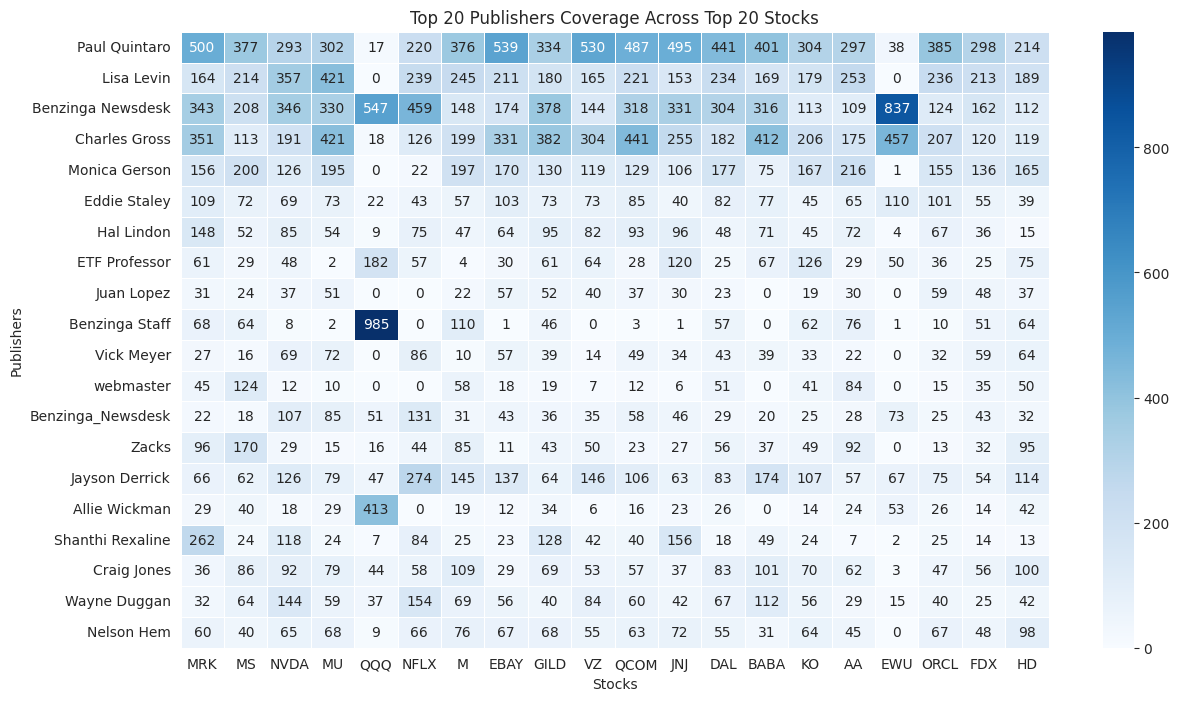

In [53]:
plot_top_publishers_stocks_coverage(rating_df, top_n=20)

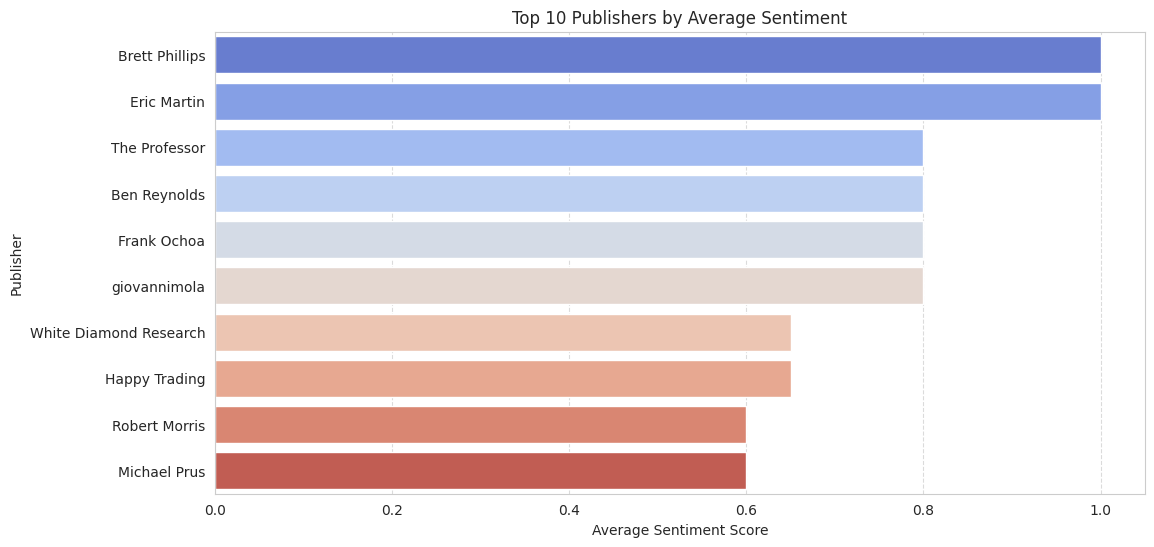

In [50]:
# Average Sentiment for Each Publisher
publisher_sentiment = rating_df.groupby('publisher')['sentiment_score_textblob'].mean().sort_values(ascending=False)

# Plot sentiment distribution across publishers
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_sentiment.head(10).values, y=publisher_sentiment.head(10).index, palette='coolwarm')
plt.title('Top 10 Publishers by Average Sentiment')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Publisher')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()